In [1]:
#This loads libraries to be used and also tells the progam to display output within the notebook

import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#This loads the boundary files for provinces/territories and displays the first 5 rows. Download the files at:
#http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm

prov=geopandas.read_file("Prov_terr\lpr_000b16a_e.shp")
prov.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230...."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8..."


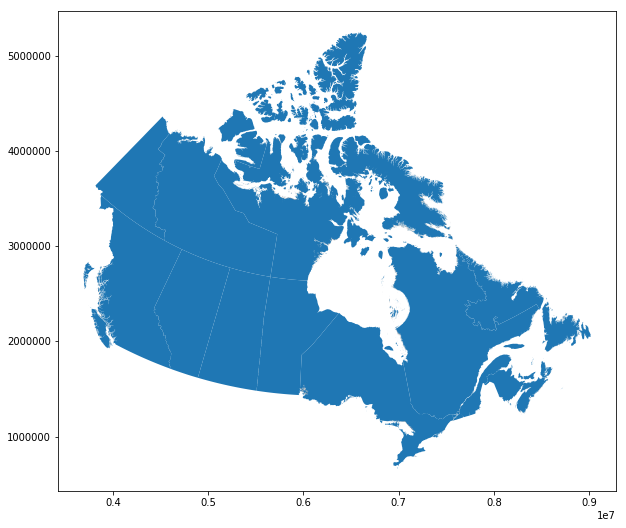

In [3]:
#This plots the provinces/territories shape files.

prov.plot(figsize=(10,10))

In [4]:
#This adds a random column ("rand") to prov, and displays the first 3 rows.
#Instead of the random column, a column with the actual data can be added by, for instance, loading a file with the data
#into "df" and joining "df" with "prov." It is possible to drop unnecessary columns, as well.

prov['rand']=np.random.rand(prov.shape[0])
prov.head(3)

#df=pd.read_csv('name_of_file',index_col='index_column_name_optional')
#prov=prov.join(df,on='name_of_col_on_which_to_join')

#prov.drop(columns=['list','of','columns','to','drop'])

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,rand
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839...",0.271710
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435...",0.284261
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710...",0.294629


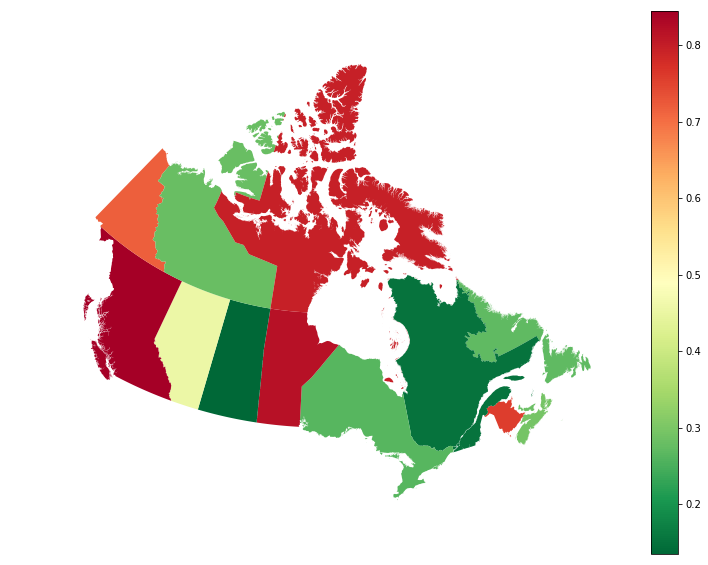

In [5]:
#This plots prov once more, but with additional parameters, such as a legend.

f, ax = plt.subplots(1,figsize=(12.5,10))
ax = prov.plot(column='rand',cmap='RdYlGn_r',ax=ax,legend=True)
ax.set_aspect('equal')
ax.set_axis_off()

#plt.savefig('name_of_file_1.png')

In [6]:
#This loads the "Census metropolitan areas and census agglomerations" boundary files. Downlaod them at:
#http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm

CMA=geopandas.read_file("CMA\lcma000b16a_e.shp")
CMA.head()

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
0,512,35512,Brockville,D,35,Ontario,"(POLYGON ((7494625.237145 1128257.37143, 74950..."
1,442,24442,Trois-Rivières,B,24,Quebec / Québec,"(POLYGON ((7685035.982855 1380936.54857, 76866..."
2,444,24444,Shawinigan,D,24,Quebec / Québec,"POLYGON ((7634181.68857 1409252.82857, 7634554..."
3,447,24447,Drummondville,K,24,Quebec / Québec,"POLYGON ((7705178.24857 1332485.077145, 770518..."
4,450,24450,Granby,K,24,Quebec / Québec,"POLYGON ((7703435.44 1270659.02, 7703893.90571..."


In [7]:
#This selects only the 36 CMAs (designated as CMATYPE 'B')

CMA2=CMA[CMA.CMATYPE=='B'].copy()
CMA2.head()

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
1,442,24442,Trois-Rivières,B,24,Quebec / Québec,"(POLYGON ((7685035.982855 1380936.54857, 76866..."
7,462,24462,Montréal,B,24,Quebec / Québec,"(POLYGON ((7635857.25143 1298408.934285, 76365..."
9,568,35568,Barrie,B,35,Ontario,"POLYGON ((7171917.359999999 1031018.477145, 71..."
12,580,35580,Greater Sudbury / Grand Sudbury,B,35,Ontario,"POLYGON ((7043514.522855001 1276102.962855, 70..."
18,001,10001,St. John's,B,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,"(POLYGON ((8959563.20857 2171809.622855, 89595..."


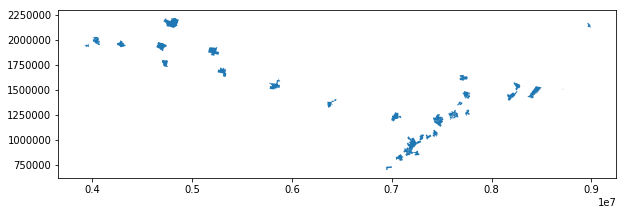

In [8]:
#Plot of CMA2

CMA2.plot(figsize=(10,10))

In [9]:
#This counts the number of rows in the CMA2 dataframe

CMA2.count()

CMAUID      36
CMAPUID     36
CMANAME     36
CMATYPE     36
PRUID       36
PRNAME      36
geometry    36
dtype: int64

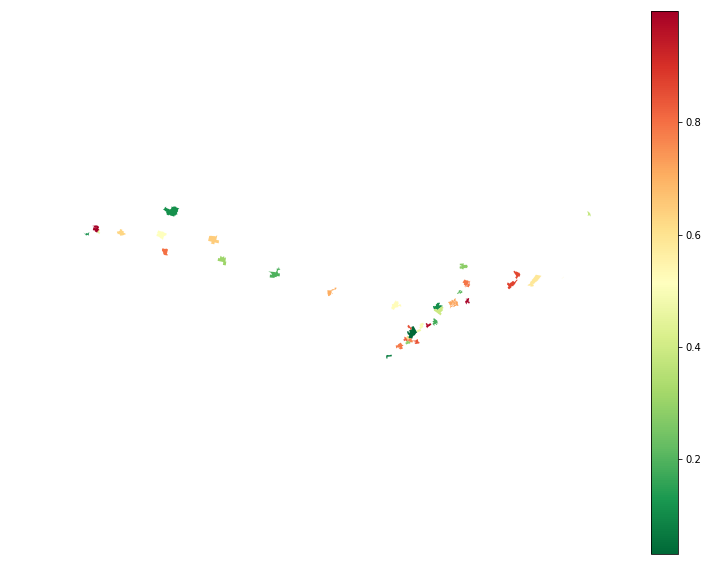

In [10]:
#Addition of a random column to CMA2 and its plot

CMA2['rand']=np.random.rand(CMA2.shape[0])

f2, ax2 = plt.subplots(1,figsize=(12.5,10))
ax2 = CMA2.plot(column='rand',cmap='RdYlGn_r',ax=ax2,legend=True)
ax2.set_aspect('equal')
ax2.set_axis_off()

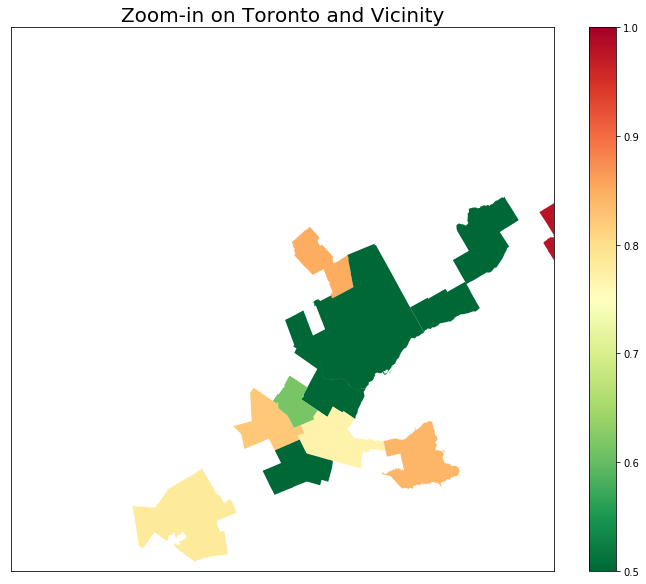

In [11]:
#It is possible to zoom in onto areas of the plot, set the color range limits, add a title, and so on.

f3, ax3 = plt.subplots(1,figsize=(12.5,10))
ax3 = CMA2.plot(column='rand',cmap='RdYlGn_r',ax=ax3,legend=True,vmin=0.5,vmax=1)
ax3.set_xlim(6950000, 7350000)
ax3.set_ylim(780000, 1180000)
ax3.set_aspect('equal')
ax3.set_title('Zoom-in on Toronto and Vicinity', fontsize=20)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
plt.show()

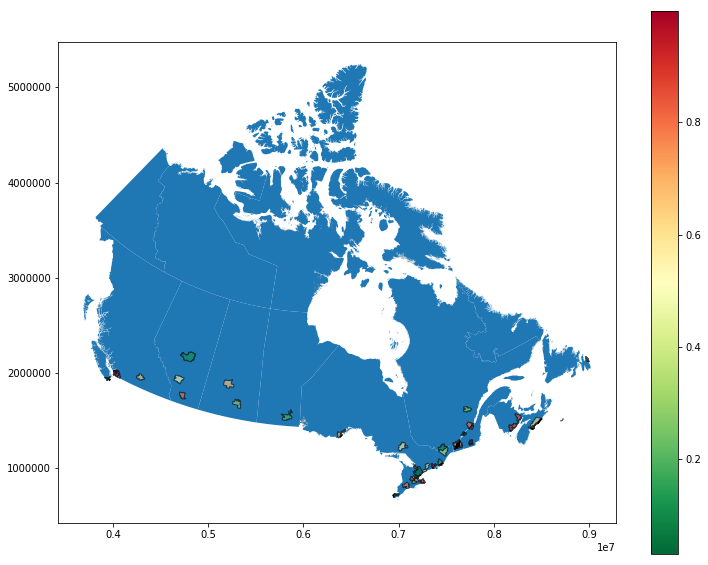

In [12]:
#It is possible to display multiple shapefiles on a single plot, but the shapefiles need to be converted into
#the same geographical coordinates (already done for provinces and CMA)

f4, ax4 = plt.subplots(1,figsize=(12.5,10))
ax4 = prov.plot(ax=ax4)
ax4.set_aspect('equal')
CMA2.plot(column='rand',cmap='RdYlGn_r',ax=ax4,legend=True,edgecolor='black',alpha=0.6)
plt.show()

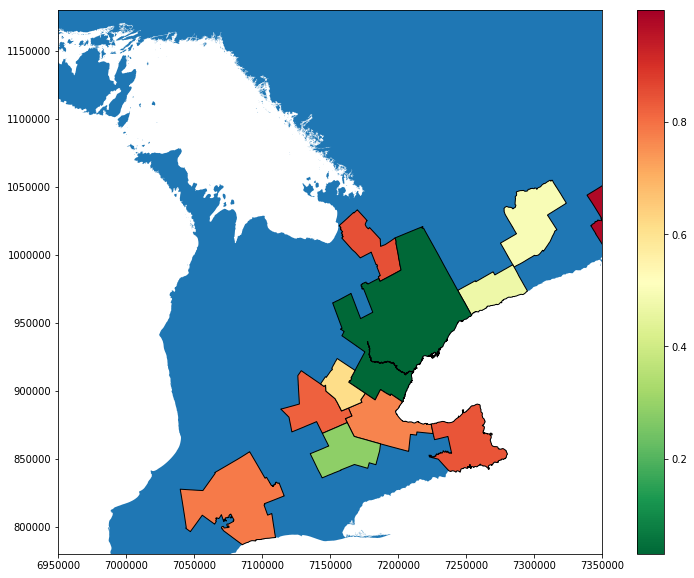

In [15]:
#Zoomed-in version

f5, ax5 = plt.subplots(1,figsize=(12.5,10))
ax5 = prov.plot(ax=ax5)
ax5.set_aspect('equal')
ax5.set_xlim(6950000, 7350000)
ax5.set_ylim(780000, 1180000)
CMA2.plot(column='rand',cmap='RdYlGn_r',ax=ax5,legend=True,edgecolor='black',alpha=1)
plt.show()